In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [333]:
dataset = pd.read_csv('SaratogaHouses.csv')

In [334]:
dataset.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [335]:
x = dataset[['livingArea', 'landValue',
             'rooms', 'centralAir']].values
y = dataset['price'].values

In [336]:
x[:,-1]

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [337]:
from sklearn.preprocessing import LabelEncoder

In [338]:
encoder = LabelEncoder()

In [339]:
x[:,-1] = encoder.fit_transform(x[:,-1])

In [340]:
x[:,-1][:5]

array([0, 0, 0, 0, 1], dtype=object)

In [341]:
from sklearn.preprocessing import StandardScaler

In [342]:
std = StandardScaler()

In [343]:
x = std.fit_transform(x)

In [344]:
y = y.reshape(-1,1)
y = std.fit_transform(y)

In [345]:
x[:2]

array([[-1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 0.31951971, -0.350095  , -0.44981202, -0.76221375]])

In [346]:
y[:2]

array([[-0.80748259],
       [-0.31349249]])

In [347]:
x.shape

(1728, 4)

In [348]:
x0 = np.ones(x.shape[0])

In [349]:
len(x0)

1728

In [350]:
newX = np.array([x0, x[:,0], x[:,1], x[:,2], x[:,3]])

In [351]:
newX = newX.T

In [352]:
newX[:5]

array([[ 1.        , -1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 1.        ,  0.31951971, -0.350095  , -0.44981202, -0.76221375],
       [ 1.        ,  0.30499787, -0.77853137,  0.41382706, -0.76221375],
       [ 1.        ,  0.30499787, -0.45291972, -0.88163155, -0.76221375],
       [ 1.        , -1.47634791, -0.5586007 , -1.74527063,  1.31196793]])

In [353]:
B = np.zeros(newX.shape[1])

In [354]:
B

array([0., 0., 0., 0., 0.])

In [355]:
n = newX.shape[0]

In [356]:
n

1728

In [357]:
def cost_function(x,y,B):
    return np.sum((newX.dot(B) - y) ** 2) / (2*n)

In [358]:
cost_history = []
def gradient_descent(x,y,B,epochs,learning_rate):
    for epoch in range(epochs):
        y_pred = x.dot(B)
        loss = y_pred - y
        gradient = x.T.dot(loss) / n
        B = B - learning_rate * gradient
        cost = cost_function(x,y,B)
        cost_history.append(cost)
    return cost_history, B

In [359]:
cost_history, B = gradient_descent(
    newX,y.flatten(),B,epochs=5000,
    learning_rate=0.001)

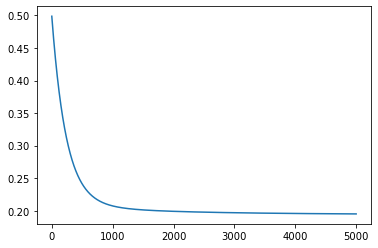

In [360]:
count = [i for i in range(5000)]
a = plot.plot(count, cost_history)

In [363]:
y_pred = newX.dot(B)

In [364]:
from sklearn.metrics import mean_squared_error

In [366]:
mse = mean_squared_error(y_pred,y)

In [367]:
rmse = np.sqrt(mse)

In [368]:
mse,rmse

(0.3901616680301511, 0.6246292244445109)